# MOTUS 2024 : Simulation des déplacement au sein de la tour Séquoia sur une journée

Ce Notebook vous présente l'interface d'utilisation du code permettant la simulation d'une journée d'utilisation des ascenseurs dans la tour séquoia

ce code nécessite les packages pandas, scipy, numpy, datetime, matplotlib et seaborn.<br>
Si vous ne les possédez pas sur l'environnement que vous utilisez, créez un nouvel environnement en utilisant le fichier en.yaml <br>
et en suivant les instructions dans le fichier Readme.md

In [1]:
#import des données import simulateur as simulateur
from Misc_modif import generer_evenements_demande
import Ascenseur as Ascenseur
import sim_test as simulateur_modif
import pandas as pd
import postprocessing as plots

In [2]:
#génération de la graine pour assurer la réplicabilité des résulats
graine = 15

#définition de la conso énergétique d'un déplacement
facteur_energetique = 0.0015 #[kWh/s] 

In [19]:
# Définition des paramètres de la simulation

nombre_usagers = 1000

#heure arrivé au travail
debut_arrivee_employes = 7
fin_arrivee_employes = 10

#heure départ pour réfectoire
debut_pause_dejeuner = 11.5 
fin_pause_dejeuner = 13

#durée pause déjeuner
duree_mini_pause_dejeuner = 0.5
duree_max_pause_dejeuner = 1.5

#heure départ du travail
debut_depart_employes = 16.5
fin_depart_employes = 20

#proportion de pers respectant la consigne de prendre les escaliers pour des trajets inf à 4 étages
proba = 1

#temps de montée pour 1 étage par l'escalier (en sec)
temps_1etage = 17


In [20]:
nombre_repetitions = 3
Usagers_list = []
Ascenseur_list = []

In [21]:
for k in range(nombre_repetitions):
    # Création des ascenseurs
    ascenseurs = []
    for i in range(0, 8):
        ascenseurs.append(Ascenseur.Ascenseur("A" + str(i), 10, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], 0.8))
    for i in range(8, 16):
        ascenseurs.append(Ascenseur.Ascenseur("B" + str(i - 8), 10, [0,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36], 0.8))
    # Génération des événements de demande
    evenements_demande = generer_evenements_demande(nombre_usagers, debut_arrivee_employes, fin_arrivee_employes,
                                debut_pause_dejeuner, fin_pause_dejeuner,
                                duree_mini_pause_dejeuner, duree_max_pause_dejeuner,
                                debut_depart_employes, fin_depart_employes,
                                graine, proba)

    # Simulation
    Usagers = simulateur_modif.simuler(evenements_demande, ascenseurs, temps_1etage)
    Usagers_list.append(Usagers)
    Ascenseur_list.append(ascenseurs)

In [22]:
Ascenseur_list[0][0].history

{'etage': [0,
  0,
  12,
  0,
  17,
  0,
  9,
  0,
  16,
  0,
  6,
  0,
  11,
  0,
  12,
  0,
  18,
  0,
  4,
  0,
  8,
  0,
  4,
  0,
  13,
  0,
  4,
  0,
  12,
  0,
  15,
  0,
  17,
  0,
  18,
  0,
  12,
  0,
  18,
  0,
  14,
  0,
  15,
  0,
  13,
  0,
  9,
  0,
  18,
  0,
  18,
  0,
  12,
  0,
  17,
  0,
  10,
  0,
  10,
  0,
  14,
  0,
  4,
  0,
  9,
  0,
  15,
  0,
  11,
  0,
  13,
  0,
  17,
  0,
  10,
  0,
  6,
  0,
  18,
  0,
  9,
  0,
  6,
  0,
  16,
  0,
  7,
  0,
  10,
  0,
  4,
  0,
  6,
  0,
  17,
  0,
  5,
  0,
  7,
  0,
  6,
  0,
  9,
  0,
  5,
  0,
  12,
  0,
  15,
  0,
  4,
  0,
  13,
  0,
  14,
  0,
  18,
  0,
  11,
  0,
  15,
  0,
  7,
  0,
  12,
  0,
  13,
  0,
  16,
  0,
  6,
  0,
  10,
  0,
  16,
  0,
  8,
  0,
  5,
  0,
  4,
  0,
  15,
  0,
  8,
  0,
  6,
  0,
  18,
  12,
  0,
  8,
  0,
  8,
  0,
  12,
  0,
  14,
  0,
  18,
  0,
  12,
  0,
  7,
  0,
  16,
  0,
  4,
  0,
  4,
  0,
  14,
  0,
  6,
  0,
  12,
  0,
  6,
  0,
  18,
  0,
  6,
  0,
  8,
  0,
  10,
  0,


In [23]:
df = plots.create_outputs_usagers(Usagers_list[0])

In [24]:
df['anomalie'] = df['heure arrivée ascenseur']>df['heures arrivée étage']

0

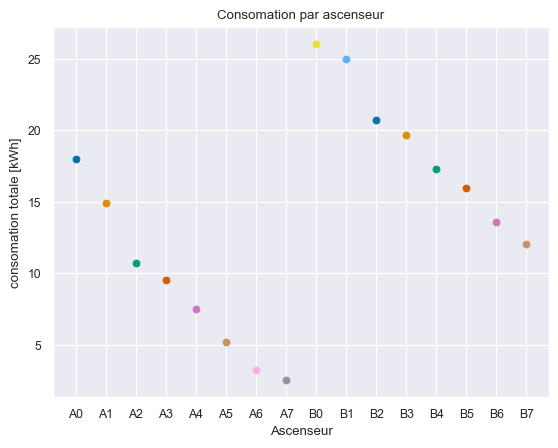

In [25]:
plots.plot_conso_ascenseurs(Ascenseur_list[0], facteur_energetique)

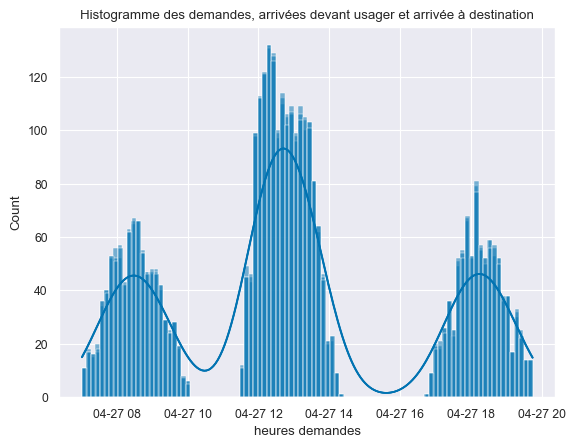

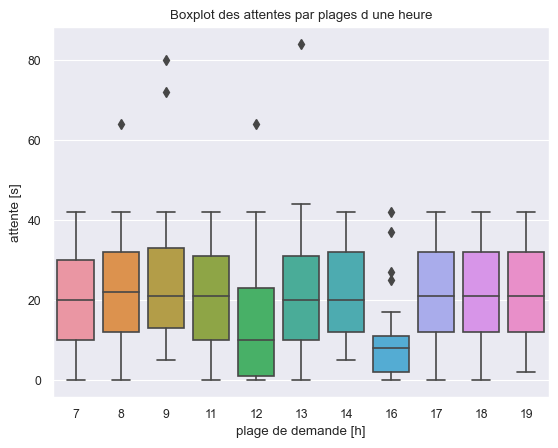

0

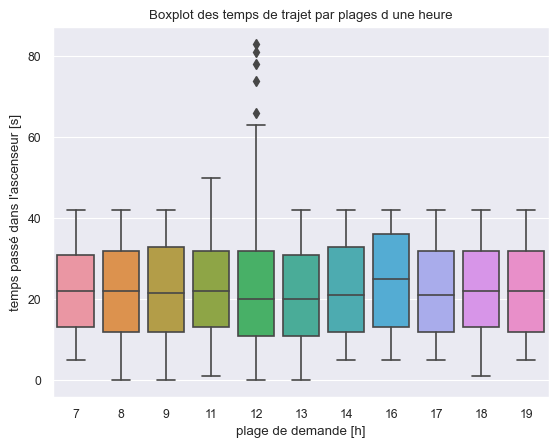

In [26]:
plots.plot_attente_usagers(Usagers_list[0])